In [1]:
%matplotlib notebook

In [2]:
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!ls ml-100k/

allbut.pl  README   u2.base  u3.test  u5.base  ua.test	u.data	 u.item
data	   u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user


In [4]:
f=open('./ml-100k/u.data')

In [5]:
transactions=defaultdict(lambda:'')

In [6]:
for row in f:
    row=row.strip().split()
    transactions[(row[1],row[2])]=transactions[(row[1],row[2])]+row[0]+','

In [7]:
len(transactions)

6714

In [8]:
dkeys=transactions.keys()

In [9]:
transactions[('242', '3')]

'196,63,154,21,417,202,537,617,461,139,473,206,866,937,758,871,279,500,721,'

In [10]:
with open('./ml-100k/data','w') as file:
    for key,value in transactions.items():
        file.write(value[:-1]+'\n')

In [11]:
!head -n3 ./ml-100k/data

196,63,154,21,417,202,537,617,461,139,473,206,866,937,758,871,279,500,721
186,62,197,102,144,88,222,241,346,461,498,269,116,63,555,139,515,685,327,721,431,520,401,151,833,787,775,422,451,535,782,656,71,845,854,902,724,564,278,587,40,812,551,475,673,417
22,5,13,222,405


In [12]:
similarity_dict=defaultdict(lambda:{})
count_uid={}

In [13]:
with open('./ml-100k/data','r') as file:
    freader=csv.reader(file)
    for row in freader:
        for pos,x in enumerate(row):
            for y in row[pos:]:
                if x!=y:
                    similarity_dict[x][y]=similarity_dict[x].get(y,0)+1
                    similarity_dict[y][x]=similarity_dict[y].get(x,0)+1
                else:
                    count_uid[x]=count_uid.get(x,0)+1

In [14]:
similarity_dict['1']

{'210': 29,
 '87': 32,
 '276': 72,
 '43': 34,
 '11': 29,
 '406': 44,
 '268': 46,
 '435': 59,
 '389': 29,
 '455': 30,
 '805': 37,
 '378': 49,
 '417': 42,
 '621': 30,
 '766': 22,
 '92': 61,
 '345': 37,
 '897': 30,
 '804': 49,
 '299': 36,
 '216': 24,
 '58': 31,
 '279': 36,
 '217': 10,
 '215': 26,
 '13': 55,
 '158': 27,
 '103': 7,
 '328': 36,
 '298': 22,
 '293': 44,
 '119': 23,
 '327': 23,
 '263': 20,
 '363': 42,
 '194': 39,
 '275': 16,
 '429': 66,
 '10': 26,
 '458': 24,
 '454': 24,
 '60': 41,
 '343': 46,
 '301': 53,
 '117': 24,
 '144': 30,
 '479': 47,
 '313': 34,
 '124': 7,
 '425': 26,
 '323': 16,
 '484': 29,
 '296': 28,
 '346': 31,
 '606': 42,
 '178': 43,
 '608': 23,
 '659': 29,
 '586': 16,
 '700': 6,
 '538': 12,
 '573': 10,
 '442': 27,
 '632': 21,
 '676': 14,
 '96': 19,
 '748': 24,
 '671': 23,
 '44': 37,
 '201': 35,
 '757': 36,
 '625': 16,
 '495': 29,
 '883': 37,
 '249': 30,
 '896': 45,
 '536': 25,
 '847': 20,
 '833': 24,
 '758': 58,
 '295': 41,
 '693': 17,
 '643': 45,
 '109': 34,
 '751

In [15]:
max(similarity_dict['1'].keys(),key=lambda x:similarity_dict['1'][x])

'276'

In [16]:
similarity_dict['1']['276']

72

In [17]:
len(count_uid)#no of users

943

In [18]:
max(count_uid.keys(),key=lambda x:count_uid[x])

'405'

In [19]:
max(count_uid.values())

737

In [20]:
count_uid

{'196': 39,
 '63': 93,
 '154': 51,
 '21': 179,
 '417': 365,
 '202': 20,
 '537': 490,
 '617': 108,
 '461': 23,
 '139': 24,
 '473': 35,
 '206': 64,
 '866': 20,
 '937': 40,
 '758': 357,
 '871': 115,
 '279': 434,
 '500': 225,
 '721': 168,
 '186': 92,
 '62': 232,
 '197': 118,
 '102': 216,
 '144': 206,
 '88': 21,
 '222': 387,
 '241': 23,
 '346': 193,
 '498': 149,
 '269': 323,
 '116': 143,
 '555': 52,
 '515': 40,
 '685': 20,
 '327': 284,
 '431': 21,
 '520': 23,
 '401': 153,
 '151': 307,
 '833': 267,
 '787': 57,
 '775': 28,
 '422': 97,
 '451': 98,
 '535': 218,
 '782': 232,
 '656': 24,
 '71': 38,
 '845': 31,
 '854': 217,
 '902': 49,
 '724': 85,
 '564': 34,
 '278': 23,
 '587': 98,
 '40': 35,
 '812': 20,
 '551': 334,
 '475': 20,
 '673': 35,
 '22': 128,
 '5': 175,
 '13': 636,
 '405': 737,
 '244': 238,
 '85': 288,
 '201': 386,
 '454': 236,
 '7': 403,
 '655': 685,
 '639': 148,
 '870': 269,
 '916': 317,
 '896': 362,
 '166': 20,
 '125': 182,
 '702': 31,
 '141': 107,
 '462': 33,
 '729': 21,
 '298': 127

<IPython.core.display.Javascript object>


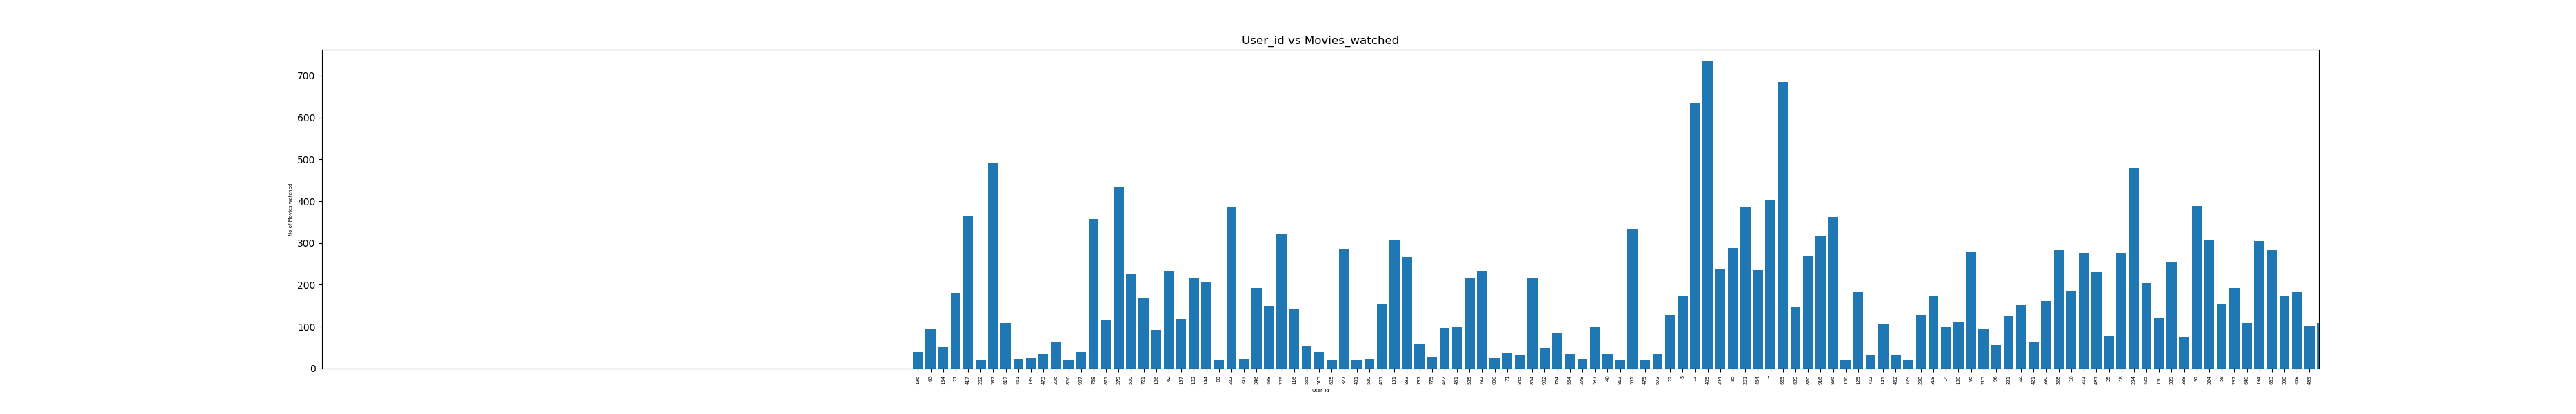

In [21]:
index = np.arange(len(count_uid))
label=count_uid.keys()
return_values=plt.bar(index, count_uid.values())
plt.xlabel('User_id', fontsize=5)
plt.ylabel('No of Movies watched', fontsize=5)
plt.xticks(index, label, fontsize=5, rotation=90)
plt.title('User_id vs Movies_watched')
plt.show()

In [22]:
from apyori import apriori
def data_generator(filename):
    def data_gen():
        with open(filename) as file:
            for line in file:
                yield tuple(k for k in line.strip().split(','))      
    return data_gen()

In [23]:
userids_transactions = data_generator('./ml-100k/data')
results = list(apriori(userids_transactions, min_support=0.01, min_confidence=0.03))

In [24]:
results[-5:-1]

[RelationRecord(items=frozenset({'896', '916'}), support=0.01012809055704498, ordered_statistics=[OrderedStatistic(items_base=frozenset({'896'}), items_add=frozenset({'916'}), confidence=0.1878453038674033, lift=3.9785279815954127), OrderedStatistic(items_base=frozenset({'916'}), items_add=frozenset({'896'}), confidence=0.21451104100946372, lift=3.9785279815954127)]),
 RelationRecord(items=frozenset({'92', '896'}), support=0.01236222817992255, ordered_statistics=[OrderedStatistic(items_base=frozenset({'896'}), items_add=frozenset({'92'}), confidence=0.2292817679558011, lift=3.9675200774619808), OrderedStatistic(items_base=frozenset({'92'}), items_add=frozenset({'896'}), confidence=0.21391752577319587, lift=3.9675200774619808)]),
 RelationRecord(items=frozenset({'92', '916'}), support=0.01385165326184093, ordered_statistics=[OrderedStatistic(items_base=frozenset({'916'}), items_add=frozenset({'92'}), confidence=0.29337539432176657, lift=5.076604117207063), OrderedStatistic(items_base=fr